# Understanding and Predicting Childhood Obesity in London: The Roles of Fast Food Density, Policy Intervention, and Socioeconomic Context

## Preparation

- [Github link](https://github.com/wbwhaha/SDS_Assessment)

- Number of words: 1493

- Runtime: Within 5 minutes

- Coding environment: **Python 3.13.0**

- License: this notebook is made available under the [Creative Commons Attribution license](https://creativecommons.org/licenses/by/4.0/).

- Additional library *[libraries not included in SDS Docker or not used in this module]*:
    - **None**

In [2722]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2723]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [2724]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2725]:
pd.set_option('display.max_rows', 10)

## Table of contents

- [1. Introduction](#1.-Introduction)
  

- [2. Research questions](#2.-Research-questions)

- [3. Data](#3.-Data)
  - [3.1. Data gathering](#3.1.-Data-gathering)
  - [3.2. Data cleaning](#3.2.-Data-cleaning)
  - [3.3. Data merging](#3.3.-Data-merging)

- [4. Methodology](#4.-Methodology)
  - [4.1. Panel regression](#4.1.-Panel-regression)
  - [4.2. Difference in Differences](#4.2.-Difference-in-Differences)
  - [4.3. XGBoost Regressor](#4.3.-XGBoost-Regressor)

- [5. Results and discussion](#5.-Results-and-discussion)
  - [5.1. Panel analysis about fast-food outlet density](#5.1.-Panel-analysis-about-fast-food-outlet-density)
  - [5.2. DiD analysis for Takeaway Tollkit policy](#5.2.-DiD-analysis-for-Takeaway-Tollkit-policy)
  - [5.3. Prevalence of child obesity predicted by XGBoost regressor](#5.3.-Prevalence-of-child-obesity-predicted-by-XGBoost-regressor)
  
- [6. Conclusion](#6.-Conclusion)

- [7. References](#7.-References)

## 1. Introduction

[[ go back to the top ]](#Table-of-contents)

Childhood obesity is a growing public health concern in urban environments such as London (Patterson et al., 2012), where lifestyle, built environment, and socioeconomic conditions intersect in complex ways. Among the environmental factors, the local food environment—particularly the density of fast-food outlets，suggested by Jia et al .(2019), has received increasing attention for its potential role in shaping dietary behaviour and health outcomes. In response, local authorities have introduced policy interventions, such as the Takeaway Toolkit, to curb the proliferation of unhealthy food outlets near schools (Rogers et al., 2024). However, the effectiveness of such policies remains uncertain, and traditional linear models may not fully capture the interplay between environmental and socioeconomic variables. With growing access to borough-level longitudinal data and advanced machine learning tools, this study aims to deepen our understanding of both the determinants and the predictability of childhood obesity through a multi-stage analytical approach.

## 2. Research questions

[[ go back to the top ]](#Table-of-contents)

This study addresses three progressively structured research questions:
1.	`Is fast food outlet density associated with childhood obesity rates in London boroughs?`  
This explores whether greater exposure to fast food correlates with higher obesity prevalence, particularly among older children.
2.	`Have local policies like the Takeaway Toolkit effectively reduced childhood obesity?`  
Using a difference-in-differences approach, this assesses whether policy implementation led to measurable changes in obesity trends.
3.	`Can a non-linear model (XGBoost) predict childhood obesity by combining fast food density with socioeconomic factors?`  
This investigates the predictive power of machine learning in capturing complex interactions between environmental and structural variables.  
  
Together, these questions aim to enhance both understanding and prediction of childhood obesity to support evidence-based policy.


## 3. Data

[[ go back to the top ]](#Table-of-contents)

### 3.1. Data gathering

In [2726]:
# Read the origin xlsx file (from another repository) and convert each sub-sheet to a single csv file

# Most of csv files used below were extracted by the following example method

"""

excel_file_path = 'https://github.com/wbwhaha/QM_Write_Investigation/raw/refs/heads/main/Dataset_origin/childhood-obesity-borough.xlsx'

# Select the sheets needed for analysis
sheet_name_useful = ['2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
# Read the Excel file
df_xlsx_ob = pd.read_excel(excel_file_path, sheet_name=sheet_name_useful)


for sheet_name, data in df_xlsx_ob.items():
    csv_file = f'{sheet_name}.csv'
    data.to_csv(csv_file, index=False)

"""

"\n\nexcel_file_path = 'https://github.com/wbwhaha/QM_Write_Investigation/raw/refs/heads/main/Dataset_origin/childhood-obesity-borough.xlsx'\n\n# Select the sheets needed for analysis\nsheet_name_useful = ['2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']\n# Read the Excel file\ndf_xlsx_ob = pd.read_excel(excel_file_path, sheet_name=sheet_name_useful)\n\n\nfor sheet_name, data in df_xlsx_ob.items():\n    csv_file = f'{sheet_name}.csv'\n    data.to_csv(csv_file, index=False)\n\n"

In [ ]:
# Read datasets from another repository
df_pop = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/population-density-borough.csv')
df_fastfood = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/fastfood_outlet_london.csv')
df_earning = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/Total%2C%20Hourly.csv')

df_education_2013 = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/2013.csv')
df_education_2014 = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/2014.csv')
df_education_2015 = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/2015.csv')
df_education_2016 = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/2016.csv')
df_education_2017 = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/2017.csv')
df_education_2018 = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/2018.csv')

In [2728]:
# Define a function to read serval datasets from github
def read_csv(year, dict):
    if year < 2009:
        file_path = f'https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/{year}-0{year-1999}.csv'
        dict[year] = pd.read_csv(file_path, header=None)
    else:
        file_path = f'https://raw.githubusercontent.com/wbwhaha/QM_Write_Investigation/refs/heads/main/Dataset_selected/{year}-{year-1999}.csv'
        dict[year] = pd.read_csv(file_path, header=None)

    return dict

In [2729]:
datasets_dict = {}

year_start_1 = 2008

# Store the datasets into a single dictionary
while year_start_1 <= 2019:
    read_csv(year_start_1, datasets_dict)
    year_start_1 += 1

### 3.2. Data cleaning

In [2730]:
# Define a function to clean the extracted csv file and rename the columns for further analysis
# Since the data format from 2008 to 2019 is constantly changing, several situations need to be handled.

def clean_data_and_rename_columns(df, year):

    if 2008 <= year < 2010:
        df = df.iloc[2:, :]

        columns_to_drop = [3,5,7,9,11,13,15,17]
        df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

        df.iloc[0,2] = 'rep_under_P'
        df.iloc[0,3] = 'year6_under_P'
        df.iloc[0,4] = 'rep_health_P'
        df.iloc[0,5] = 'year6_health_P'
        df.iloc[0,6] = 'rep_over_P'
        df.iloc[0,7] = 'year6_over_P'
        df.iloc[0,8] = 'rep_obese_P'
        df.iloc[0,9] = 'year6_obese_P'
        df.iloc[0,10] = 'rep_N'
        df.iloc[0,11] = 'year6_N'

        df.columns = df.iloc[0]
        df = df[1:]

        df = df.dropna(subset=['Code'])

        df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

    elif year == 2010:

        df = df.iloc[2:, :]

        columns_to_drop = [3,5,7,9,11,13,15,17]
        df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

        df.iloc[0,2] = 'rep_under_P'
        df.iloc[0,3] = 'year6_under_P'
        df.iloc[0,4] = 'rep_health_P'
        df.iloc[0,5] = 'year6_health_P'
        df.iloc[0,6] = 'rep_over_P'
        df.iloc[0,7] = 'year6_over_P'
        df.iloc[0,8] = 'rep_obese_P'
        df.iloc[0,9] = 'year6_obese_P'
        df.iloc[0,10] = 'rep_N'
        df.iloc[0,11] = 'year6_N'
        df.iloc[0,12] = 'rep_p_R'
        df.iloc[0,13] = 'year6_p_R'

        df.columns = df.iloc[0]
        df = df[1:]

        df = df.dropna(subset=['Code'])

        df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

    elif year == 2011:

        df = df.iloc[2:, :]

        columns_to_drop = [3,5,7,9,11,13,15,17]
        df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

        df.iloc[0,2] = 'rep_under_P'
        df.iloc[0,3] = 'year6_under_P'
        df.iloc[0,4] = 'rep_health_P'
        df.iloc[0,5] = 'year6_health_P'
        df.iloc[0,6] = 'rep_over_P'
        df.iloc[0,7] = 'year6_over_P'
        df.iloc[0,8] = 'rep_obese_P'
        df.iloc[0,9] = 'year6_obese_P'
        df.iloc[0,10] = 'rep_N'
        df.iloc[0,11] = 'year6_N'
        df.iloc[0,12] = 'rep_p_R'
        df.iloc[0,13] = 'year6_p_R'
        df.iloc[0,14] = 'old_d_code'

        df.columns = df.iloc[0]
        df = df[1:]

        df = df.dropna(subset=['ONS Code'])

        df.iloc[:, 2:-1] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

    elif year == 2012:

        df = df.iloc[2:, :]

        columns_to_drop = [3,5,7,9,11,13,15,17]
        df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

        df.iloc[0,2] = 'rep_under_P'
        df.iloc[0,3] = 'year6_under_P'
        df.iloc[0,4] = 'rep_health_P'
        df.iloc[0,5] = 'year6_health_P'
        df.iloc[0,6] = 'rep_over_P'
        df.iloc[0,7] = 'year6_over_P'
        df.iloc[0,8] = 'rep_obese_P'
        df.iloc[0,9] = 'year6_obese_P'
        df.iloc[0,10] = 'rep_N'
        df.iloc[0,11] = 'year6_N'
        df.iloc[0,12] = 'rep_p_R'
        df.iloc[0,13] = 'year6_p_R'

        df.columns = df.iloc[0]
        df = df[1:]

        df = df.dropna(subset=['ONS Code'])

        df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
    
    elif 2012 < year < 2016:

        df = df.iloc[2:, :]

        columns_to_drop = [3,4,6,7,9,10,12,13,15,16,18,19,21,22,24,25]
        df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

        df.iloc[0,2] = 'rep_under_P'
        df.iloc[0,3] = 'year6_under_P'
        df.iloc[0,4] = 'rep_health_P'
        df.iloc[0,5] = 'year6_health_P'
        df.iloc[0,6] = 'rep_over_P'
        df.iloc[0,7] = 'year6_over_P'
        df.iloc[0,8] = 'rep_obese_P'
        df.iloc[0,9] = 'year6_obese_P'
        df.iloc[0,10] = 'rep_N'
        df.iloc[0,11] = 'year6_N'
        df.iloc[0,12] = 'rep_p_R'
        df.iloc[0,13] = 'year6_p_R'

        df.columns = df.iloc[0]
        df = df[1:]

        df = df.dropna(subset=['ONS Code'])

        df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

    elif year == 2016:

        df = df.iloc[2:, :]

        columns_to_drop = [3,4,6,7,9,10,12,13,15,16,18,19,21,22,24,25]
        df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

        df.iloc[0,2] = 'rep_under_P'
        df.iloc[0,3] = 'year6_under_P'
        df.iloc[0,4] = 'rep_health_P'
        df.iloc[0,5] = 'year6_health_P'
        df.iloc[0,6] = 'rep_over_P'
        df.iloc[0,7] = 'year6_over_P'
        df.iloc[0,8] = 'rep_obese_P'
        df.iloc[0,9] = 'year6_obese_P'
        df.iloc[0,10] = 'rep_N'
        df.iloc[0,11] = 'year6_N'

        df.columns = df.iloc[0]
        df = df[1:]

        df = df.dropna(subset=['ONS Code'])

        df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

    elif 2016 < year < 2020:

        df = df.iloc[2:, :]

        columns_to_drop = [3,4,6,7,9,10,12,13,15,16,18,19,21,22,24,25,27,28,30,31]
        df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

        df.iloc[0,2] = 'rep_under_P'
        df.iloc[0,3] = 'year6_under_P'
        df.iloc[0,4] = 'rep_health_P'
        df.iloc[0,5] = 'year6_health_P'
        df.iloc[0,6] = 'rep_over_P'
        df.iloc[0,7] = 'year6_over_P'
        df.iloc[0,8] = 'rep_obese_P'
        df.iloc[0,9] = 'year6_obese_P'
        df.iloc[0,10] = 'rep_ser_obese_P'
        df.iloc[0,11] = 'year6_ser_obese_P'
        df.iloc[0,12] = 'rep_N'
        df.iloc[0,13] = 'year6_N'

        df.columns = df.iloc[0]
        df = df[1:]

        df = df.dropna(subset=['ONS Code'])

        df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

    else:
        print("Please enter the correct year value.")

    return df

In [2731]:
# Apply the method to each datasets
for year in datasets_dict.keys():
    datasets_dict[year] = clean_data_and_rename_columns(datasets_dict[year], year)

In [2732]:
# Define a function to unify the ONS code of each borough
def replace_old_district_code(df_1, df_2):

    columns_to_keep = ['ONS Code', 'old_d_code']
    columns_to_drop = ['Code', 'old_d_code']

    df_replaced = pd.merge(df_1, df_2[columns_to_keep], right_on='old_d_code', left_on='Code', how='left')
    df_replaced.drop(columns_to_drop, axis=1, inplace=True)

    target_col = 'ONS Code' 
    cols = [target_col] + [col for col in df_replaced.columns if col != target_col]
    df_replaced = df_replaced[cols]

    return df_replaced

In [2733]:
# Run the function to all the subsets
year_start_2 = 2008

while year_start_2 <= 2010:
    datasets_dict[year_start_2] = replace_old_district_code(datasets_dict[year_start_2], datasets_dict[2011])
    year_start_2 += 1

(datasets_dict[2011]).drop('old_d_code', axis=1, inplace=True)

In [2734]:
# Integrate data from 2008 to 2019
df_list = []

for key, value in datasets_dict.items():
    
    df_temp = datasets_dict[key]
    df_temp['Year'] = key

    # Convert to the wide-but-cleaned format
    df_reception = df_temp[['ONS Code', 'Area', 'Year']].copy()
    df_reception['Child_Group'] = 'Reception'
    df_reception['Underweight'] = df_temp['rep_under_P']
    df_reception['Healthy'] = df_temp['rep_health_P']
    df_reception['Overweight'] = df_temp['rep_over_P']
    df_reception['Obese'] = df_temp['rep_obese_P']
    df_reception['Count'] = df_temp['rep_N']
    
    df_year6 = df_temp[['ONS Code', 'Area', 'Year']].copy()
    df_year6['Child_Group'] = 'Year6'
    df_year6['Underweight'] = df_temp['year6_under_P']
    df_year6['Healthy'] = df_temp['year6_health_P']
    df_year6['Overweight'] = df_temp['year6_over_P']
    df_year6['Obese'] = df_temp['year6_obese_P']
    df_year6['Count'] = df_temp['year6_N']
    
    df_merged = pd.concat([df_reception, df_year6], ignore_index=True)
    df_list.append(df_merged)

    df_all_years_wide = pd.concat(df_list, ignore_index=True)

    # Convert df_all_years_wide to long format
    df_all_years_long = df_all_years_wide.melt(
        id_vars=['ONS Code', 'Area', 'Year', 'Child_Group', 'Count'], 
        value_vars=['Underweight', 'Healthy', 'Overweight', 'Obese'],
        var_name='Weight_Category', 
        value_name='Prevalence'
    )

In [ ]:
# Unify the borough names
df_all_years_long['Area'] = df_all_years_long['Area'].replace('Hackney1','Hackney')
# Extract the data for London
df_all_years_long = df_all_years_long.loc[
    df_all_years_long['ONS Code'].str.startswith('E09') |
    df_all_years_long['ONS Code'].isin(['E12000007', 'ENG'])
]
# Clean the data further
df_all_years_long = df_all_years_long.dropna(subset=['Prevalence'])

df_all_years_long[['Count', 'Prevalence']] = df_all_years_long[['Count', 'Prevalence']].map(lambda x: pd.to_numeric(x, errors='coerce'))

df_all_years_long.rename(columns = {'Count': 'Number'}, inplace=True)

df_all_years_long

,ONS Code,Area,Year,Child_Group,Number,Weight_Category,Prevalence
0,E09000002,Barking and Dagenham,2008,Reception,2265.0,Underweight,0.971302
1,E09000003,Barnet,2008,Reception,3032.0,Underweight,1.418206
2,E09000004,Bexley,2008,Reception,2264.0,Underweight,0.750883
3,E09000005,Brent,2008,Reception,2959.0,Underweight,1.858736
4,E09000006,Bromley,2008,Reception,3143.0,Underweight,0.668151
...,...,...,...,...,...,...,...
4018,E09000030,Tower Hamlets,2019,Year6,3090.0,Obese,25.728155
4019,E09000031,Waltham Forest,2019,Year6,3100.0,Obese,24.032258
4021,E09000033,Westminster,2019,Year6,1320.0,Obese,25.000000
4028,E12000007,London,2019,Year6,77555.0,Obese,23.660628


### 3.3. Data Merging

In [ ]:
# Define a function to clean the original datasets of all independent variables 
# and combine them together
def create_df_independent(df_education, year):
    df_fastfood_ = df_fastfood[df_fastfood['year'] == year].drop(columns='year')

    df_earning_ = df_earning.dropna(subset='Code')

    df_earning_london = df_earning_.iloc[:33, :]
    df_earning_london = df_earning_london.loc[:, ~df_earning_london.columns.str.contains('Unnamed')]
    df_earning_london = df_earning_london[~(df_earning_london['Area'] == 'City of London')]

    df_earning_london_ = df_earning_london[['Code', 'Area', str(year)]]

    df_f_e = pd.merge(df_fastfood_, df_earning_london_, left_on='LA name', right_on='Area', how='left')
    df_f_e.drop(['Code', 'Area'], axis=1, inplace=True)
    df_f_e.rename(columns = {str(year): 'Earnings per hour (£)'}, inplace=True)

    df_education = df_education.iloc[:, [0,1,4]]
    df_education = df_education.dropna(subset='Code')
    df_education = df_education[df_education['Code'].str.startswith('E09')]
    df_education.rename(columns = {'Unnamed: 4' : 'Percentage (%) of people worked with NVQ4+'}, inplace=True)
    df_education = df_education[~(df_education['Area'] == 'City of London')]

    df_f_e_edu = pd.merge(df_f_e, df_education, left_on='LA code', right_on='Code', how='left')
    df_f_e_edu.drop(['Code' ,'Area'], axis=1, inplace=True)

    df_pop_ = df_pop[(df_pop['Code'].str.startswith('E09')) &
                (df_pop['Name'] != 'City of London')]

    df_pop_ = (df_pop_[df_pop_['Year'] == year]).iloc[:, [0,4,7]]

    df_independent = pd.merge(df_f_e_edu, df_pop_, left_on='LA code', right_on='Code', how='left'
                              ).drop('Code', axis=1)
    
    return df_independent
    

In [2737]:
df_independent_2013 = create_df_independent(df_education_2013, 2013)
df_independent_2014 = create_df_independent(df_education_2014, 2014)
df_independent_2015 = create_df_independent(df_education_2015, 2015)
df_independent_2016 = create_df_independent(df_education_2016, 2016)
df_independent_2017 = create_df_independent(df_education_2017, 2017)
df_independent_2018 = create_df_independent(df_education_2018, 2018)

In [2738]:
df_independent_2018

,LA code,LA name,Count of outlets,Earnings per hour (£),Percentage (%) of people worked with NVQ4+,Population,Population_per_hectare
0,E09000002,Barking and Dagenham,178,12.52,33,212773,58.9
1,E09000003,Barnet,257,15.61,51.5,397049,45.8
2,E09000004,Bexley,207,14.66,42,249999,41.3
3,E09000005,Brent,322,13.11,40.3,336859,77.9
4,E09000006,Bromley,263,17.77,49.6,332733,22.2
...,...,...,...,...,...,...,...
27,E09000029,Sutton,182,15.67,48.4,207378,47.3
28,E09000030,Tower Hamlets,393,17.25,54.7,317203,160.4
29,E09000031,Waltham Forest,272,14.37,48.7,283524,73.1
30,E09000032,Wandsworth,263,19.6,70.7,324400,94.7


In [ ]:
# Extract the data needed in the analysis, drop the rest
def slice_the_data(df_all_years_long, year):
    df_ = df_all_years_long[(df_all_years_long['Weight_Category'] == 'Obese') &  
                                    (df_all_years_long['Year'] == year) & 
                                    (df_all_years_long['ONS Code'].str.startswith('E09'))]
    
    df_ = df_.iloc[:, [0,1,3,4,6]]
    return df_

In [2740]:
df_obese_2013 = slice_the_data(df_all_years_long, 2013)
df_obese_2014 = slice_the_data(df_all_years_long, 2014)
df_obese_2015 = slice_the_data(df_all_years_long, 2015)
df_obese_2016 = slice_the_data(df_all_years_long, 2016)
df_obese_2017 = slice_the_data(df_all_years_long, 2017)
df_obese_2018 = slice_the_data(df_all_years_long, 2018)

In [2741]:
df_obese_2018

,ONS Code,Area,Child_Group,Number,Prevalence
3864,E09000002,Barking and Dagenham,Reception,3324.0,13.357401
3865,E09000003,Barnet,Reception,4088.0,8.121331
3866,E09000004,Bexley,Reception,2963.0,10.968613
3867,E09000005,Brent,Reception,3555.0,12.798875
3868,E09000006,Bromley,Reception,3762.0,8.001063
...,...,...,...,...,...
3933,E09000029,Sutton,Year6,2334.0,19.837189
3934,E09000030,Tower Hamlets,Year6,3144.0,25.349873
3935,E09000031,Waltham Forest,Year6,3192.0,23.715539
3936,E09000032,Wandsworth,Year6,2304.0,19.270833


In [2742]:
# Combine all the variables into a single dataset divided by years
def create_df_total(df_, df_independent, year):

    df_total = pd.merge(df_,
                        df_independent,
                        left_on='ONS Code',
                        right_on='LA code',
                        how='left')
                
    # 
    df_total['Ratio of children'] = df_total['Number'] / df_total['Population']
    df_total['Rate per 100,000 population (fastfood outlets)'] = df_total['Count of outlets'] / df_total['Population'] * 100000

    columns_to_drop = ['LA code', 'LA name', 'Number', 'Population', 'Count of outlets']

    df_total.drop(columns=columns_to_drop, axis=1, inplace=True)
    
    df_total['Year'] = year

    return df_total

In [2743]:
df_total_obese_2013 = create_df_total(df_obese_2013, df_independent_2013, 2013)
df_total_obese_2014 = create_df_total(df_obese_2014, df_independent_2014, 2014)
df_total_obese_2015 = create_df_total(df_obese_2015, df_independent_2015, 2015)
df_total_obese_2016 = create_df_total(df_obese_2016, df_independent_2016, 2016)
df_total_obese_2017 = create_df_total(df_obese_2017, df_independent_2017, 2017)
df_total_obese_2018 = create_df_total(df_obese_2018, df_independent_2018, 2018)

In [2744]:
# Create a overall panel datset for further analysis
panel_df = pd.concat([df_total_obese_2013, df_total_obese_2014, df_total_obese_2015, df_total_obese_2016, df_total_obese_2017, df_total_obese_2018], ignore_index=True)
panel_df.drop('ONS Code', axis=1, inplace=True)

panel_df.set_index(['Area', 'Year'], inplace=True)
panel_df_num = panel_df.drop('Child_Group', axis=1).apply(pd.to_numeric, errors='coerce')
panel_df_num['Child_Group'] = panel_df['Child_Group']
panel_df = panel_df_num

panel_df

,,Prevalence,Earnings per hour (£),Percentage (%) of people worked with NVQ4+,Population_per_hectare,Ratio of children,"Rate per 100,000 population (fastfood outlets)",Child_Group
Area,Year,,,,,,,
Barking and Dagenham,2013,14.159000,11.84,28.2,53.9,0.016792,101.673505,Reception
Barnet,2013,9.421800,14.95,50.4,42.6,0.010119,76.651598,Reception
Bexley,2013,11.136700,13.86,30.5,39.1,0.012848,83.996370,Reception
Brent,2013,13.785600,11.85,43.8,73.6,0.011493,96.823985,Reception
Bromley,2013,8.340200,16.48,46.4,21.2,0.011484,79.446076,Reception
...,...,...,...,...,...,...,...,...
Sutton,2018,19.837189,15.67,48.4,47.3,0.011255,87.762443,Year6
Tower Hamlets,2018,25.349873,17.25,54.7,160.4,0.009912,123.895423,Year6
Waltham Forest,2018,23.715539,14.37,48.7,73.1,0.011258,95.935441,Year6


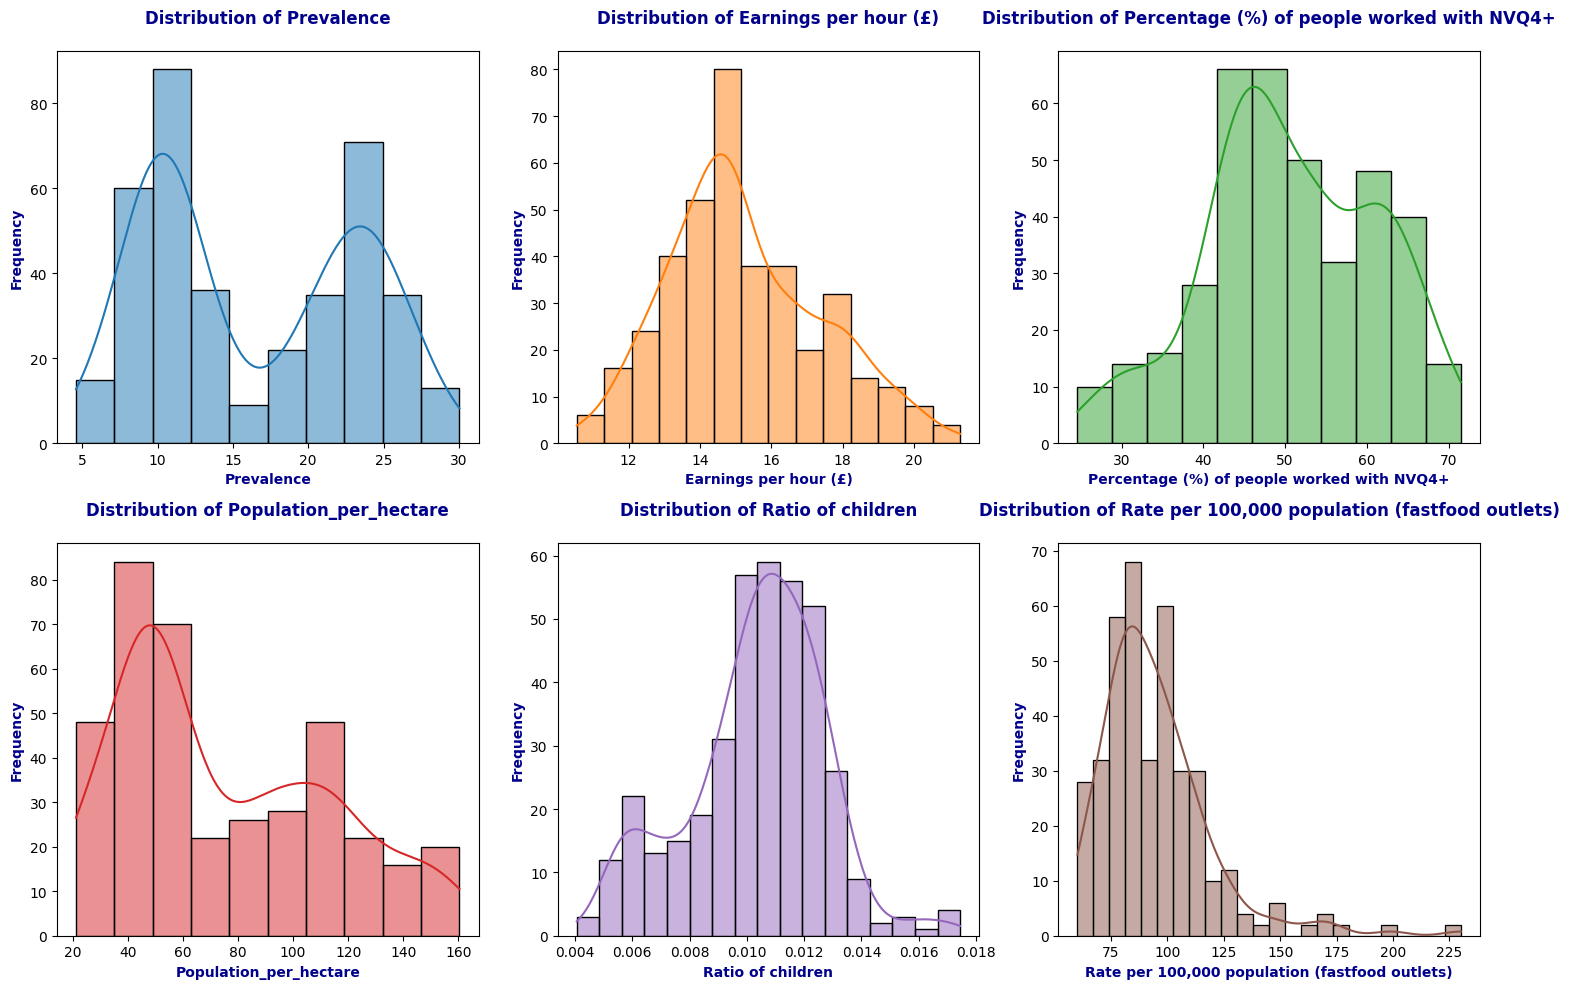

In [2745]:
# Specify the variables to plot
variables = (panel_df.drop('Child_Group', axis=1)).columns.tolist()  # Replace with your column names

# Number of plots per row
plots_per_row = 3
n_vars = len(variables)
n_rows = (n_vars + plots_per_row - 1) // plots_per_row  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each variable
for i, var in enumerate(variables):
    sns.histplot((panel_df.drop('Child_Group', axis=1))[var], kde=True, ax=axes[i], color=f"C{i}")
    axes[i].set_title(f'Distribution of {var}', fontsize=12, fontweight='bold', color='darkblue', pad=20)
    axes[i].set_xlabel(var, fontsize=10, fontweight='bold', color='darkblue')
    axes[i].set_ylabel('Frequency', fontsize=10, fontweight='bold', color='darkblue')

# Turn off unused axes
for j in range(len(variables), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


In [2746]:
panel_df.describe()

,Prevalence,Earnings per hour (£),Percentage (%) of people worked with NVQ4+,Population_per_hectare,Ratio of children,"Rate per 100,000 population (fastfood outlets)"
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,16.313506,15.243802,50.709896,74.946875,0.010338,94.743552
std,6.954486,2.144141,10.523377,38.221833,0.002370,24.489006
min,4.591837,10.550000,24.600000,21.200000,0.004061,60.083991
25%,10.188025,13.720000,43.900000,45.175000,0.008982,79.397038
50%,13.776541,14.840000,49.500000,61.100000,0.010602,89.530267
75%,23.022440,16.602500,59.675000,108.000000,0.011941,105.433147
max,30.033203,21.290000,71.500000,160.400000,0.017448,230.117131


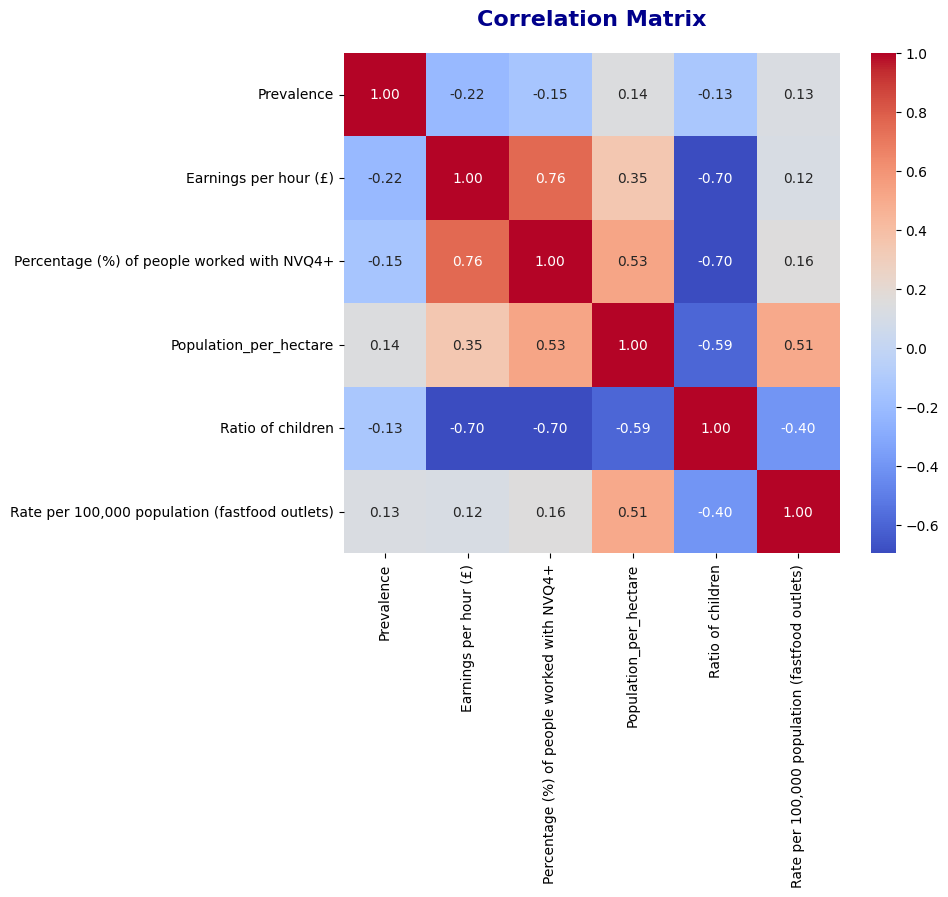

In [ ]:
# Calculate the correlation values of each variables
corr_matrix = (panel_df.drop('Child_Group', axis=1)).corr()

# Create a heatmap with the correlation values
plt.figure(figsize=(8, 6.5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.show()

The histogram and summary statistics reveal that the dependent variable, `Prevalence`, exhibits a bimodal distribution, suggesting the presence of two distinct groups (year6 and reception) of areas with differing levels of prevalence. Among the independent variables: `Earnings per hour` and `NVQ4+ education level` are approximately normally distributed, with higher earnings and education potentially associated with lower prevalence. `Population density` and `fast-food outlet rate` are both right-skewed, indicating a few areas with very high values; these may correlate with higher prevalence due to environmental and lifestyle factors. The `ratio of children` shows a relatively normal and narrow distribution, suggesting consistent demographic proportions across areas. 

| Variable                            | Type         | Description                                                             |
|-------------------------------------|--------------|-------------------------------------------------------------------------|
| Prevalence (obesity) (%)            | Numeric      | The prevalence of obesity for two child group (reception, year6) of LAs. Used as dependent variables in regression.  |
| Number ($N$)                        | Numeric      | The number of children of each child group measured in each borough.  |
| Population ($P$)                    | Numeric      | The total population of each borough.  |
| Population per hectare              | Numeric      | The population density using unit of hectare for each borough.  |
| Count of outlets ($C$)              | Numeric      | The total number of fast-food outlets in each borough.  |
| Rate of per 100,000 population ($R_{1}$)     | Numeric      | Fast-food outlet density, calculated by the formula: $R_{1}=10^5×\frac{C}{P}$ |
| Earnings per hour (£)               | Numeric      | Average earning for each people per hour in each borough.  |
| Percentage of people worked with NVQ4+ (%)   | Numeric      | The percentage of people who has a level NVQ4 or a higher qualification among people age 16-64.  |
| Ratio of children ($R_{2}$) | Numeric      | Children distribution density of each child group in each borough, calculated by the formula: $R_{2}=\frac{N}{P}$  |
| Child group                         | Categorical  | The child group contains 2 categories: Reception (aged 4-5) and Year6 (aged 10-11) |

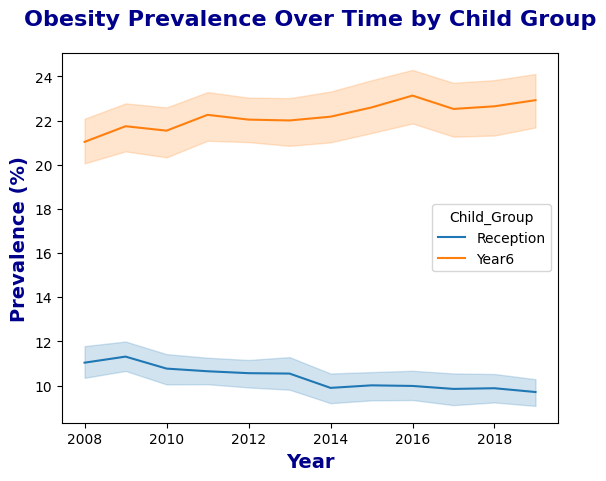

In [2747]:
df_obese = df_all_years_long[df_all_years_long['Weight_Category'] == 'Obese']

sns.lineplot(
    data=df_obese, 
    x='Year', 
    y='Prevalence', 
    hue='Child_Group'
)
plt.title('Obesity Prevalence Over Time by Child Group', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Year', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Prevalence (%)', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

The graph showed above illustrates the obesity prevalence in children over time, specifically comparing Reception-aged children (blue line) and Year 6 children (orange line) from 2008 to 2019. It's clear from the data that Year 6 children consistently exhibit higher rates of obesity than Reception children. Both groups show a generally upward trend, though there may be fluctuations. **Because of this, we will separate the year6 and reception groups in all subsequent analyses.**

## 4. Methodology

[[ go back to the top ]](#Table-of-contents)

The study uses panel regression, difference-in-differences, and XGBoost to assess how fast food density and socioeconomic factors influence childhood obesity, and whether local policies like the Takeaway Toolkit have measurable effects.

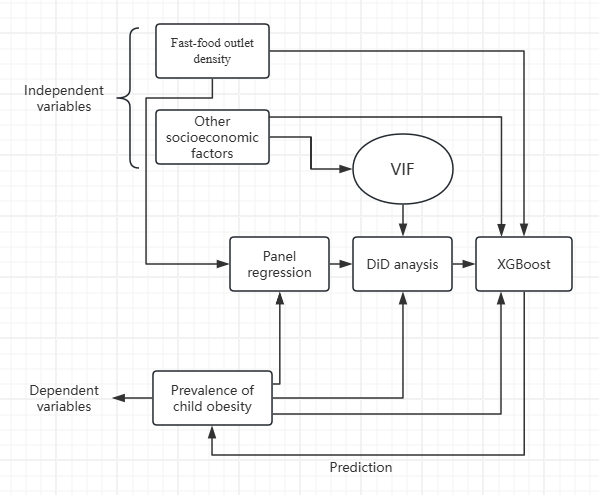

### 4.1. Panel regression

According to Moon and Weidner (2015), panel regression is a statistical method used to analyse panel data, which combines cross-sectional and time-series information. It enables researchers to examine relationships between variables while accounting for unobserved individual-specific effects that remain constant over time.

### 4.2. Difference in Differences

Difference-in-Differences (DiD) analysis is commonly used for causal inference. By comparing outcomes between a treatment group and a control group before and after an intervention, it estimates the effect of the treatment while controlling for external factors (Donald and Lang, 2007). As Conley and Taber (2011) pointed out, it is widely applied in policy evaluation.

### 4.3. XGBoost Regressor

Chen and Guestrin (2016) described XGBoost as a machine learning algorithm known for its efficiency and accuracy. It performs well on large-scale and high-dimensional data and is particularly effective in capturing nonlinear relationships. These qualities make it suitable for a variety of tasks, including financial forecasting, customer behaviour analysis, and medical risk prediction—such as estimating childhood obesity rate..

## 5. Results and discussion

[[ go back to the top ]](#Table-of-contents)

### 5.1. Panel analysis about fast-food outlet density

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculate the VIF and drop following features (modified from the practical)
def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
 
    i = 0
    
    while True: 
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            i += 1
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    if i == 0:
            print('No variables were removed.')
    else:
            print(f'{i} variables were(was) removed from the given datasets')    

    return df

#### Panel for year6 group

In [2750]:
from linearmodels import PanelOLS
import statsmodels.formula.api as smf

panel_year6 = PanelOLS.from_formula('Prevalence ~ 1 + Q("Rate per 100,000 population (fastfood outlets)") + EntityEffects+ TimeEffects', (panel_df[panel_df['Child_Group'] == 'Year6'])).fit() # run a fixed effects model
print(panel_year6)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Prevalence   R-squared:                        0.0422
Estimator:                   PanelOLS   R-squared (Between):              0.0972
No. Observations:                 192   R-squared (Within):              -0.0090
Date:                Mon, Apr 21 2025   R-squared (Overall):              0.0887
Time:                        04:16:48   Log-likelihood                   -262.73
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      6.7781
Entities:                          32   P-value                           0.0101
Avg Obs:                       6.0000   Distribution:                   F(1,154)
Min Obs:                       6.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             6.7781
                            

The model results show a statistically significant association between fast food outlet density and obesity prevalence among `Year 6` children (`p = 0.0101`). Each additional fast-food outlet per 100,000 population corresponds to a `0.024` percentage point increase in obesity rates. While modest, this effect can accumulate across boroughs with high outlet density. The relationship likely reflects the greater autonomy of older children, who are more mobile and have access to discretionary spending (Schoeppe et al., 2013), increasing their exposure to unhealthy food environments—especially in areas where fast-food outlets cluster near schools and transport hubs. These areas often coincide with higher socioeconomic deprivation, making fast food a more accessible option. The findings support targeted interventions, such as zoning restrictions and enhanced nutritional support in vulnerable communities.

#### Panel for reception group

In [2751]:
panel_rep = PanelOLS.from_formula('Prevalence ~ 1 + Q("Rate per 100,000 population (fastfood outlets)") + EntityEffects+ TimeEffects', (panel_df[panel_df['Child_Group'] == 'Reception'])).fit() # run a fixed effects model
print(panel_rep)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Prevalence   R-squared:                        0.0130
Estimator:                   PanelOLS   R-squared (Between):              0.0380
No. Observations:                 192   R-squared (Within):               0.0337
Date:                Mon, Apr 21 2025   R-squared (Overall):              0.0375
Time:                        04:16:48   Log-likelihood                   -196.02
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.0323
Entities:                          32   P-value                           0.1560
Avg Obs:                       6.0000   Distribution:                   F(1,154)
Min Obs:                       6.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             2.0323
                            

In contrast, the association between fast food density and obesity among Reception-aged children is not statistically significant (`coefficient = 0.0092, p = 0.156`). At `ages 4–5`, children rely on parents and school meals, with limited independence in food choices and minimal exposure to the external food environment. For this group, family-based interventions, early nutrition education, and support for healthy home food practices are likely to be more effective than environmental regulations alone.

### 5.2. DiD analysis for Takeaway Tollkit policy

In [ ]:
# The boroughs who introduced the following policy could be found in the apendix C in (https://edemocracy.coventry.gov.uk/documents/s44887/Adoption%20of%20Air%20Quality%20Hot%20Food%20Takeaways%20and%20Sustainable%20Urban%20Extension%20SUE%20Residential%20Design.pdf)
boro_post = ['Barking and Dagenham', 'Brent', 'Greenwich', 'Hammersmith and Fulham', 'Islington', 'Lambeth', 'Newham', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth']

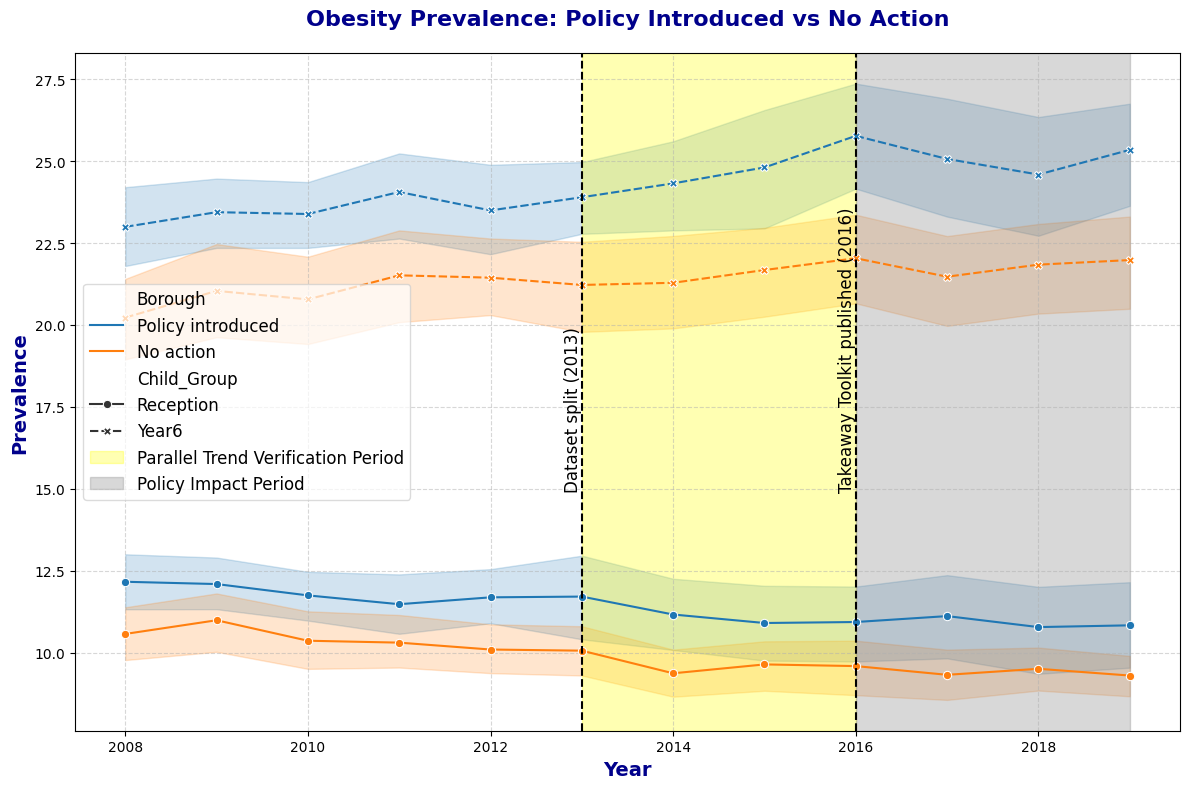

In [2753]:
# Automatically classify remaining areas into 
df_obese['Borough'] = df_obese['Area'].apply(
    lambda x: 'Policy introduced' if x in boro_post else 'No action'
)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the data using seaborn lineplot
sns.lineplot(
    data=df_obese,
    x='Year',                  
    y='Prevalence',            
    hue='Borough',               
    style='Child_Group',       
    markers=True,              
    dashes=True                
)

# Shade the region between 2013 and 2016
plt.axvspan(2013, 2016, color='yellow', alpha=0.3, label='Parallel Trend Verification Period')
plt.axvspan(2016, 2019, color='grey', alpha=0.3, label='Policy Impact Period')

# Add title, labels, and legend for the plot
plt.title('Obesity Prevalence: Policy Introduced vs No Action', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Year', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Prevalence', fontsize=14, fontweight='bold', color='darkblue')
plt.legend(loc='center left', framealpha=0.7, fontsize=12)

# Add a vertical line to indicate the year 2013 as a policy split
plt.axvline(2013, color='black', linestyle='dashed')
plt.axvline(2016, color='black', linestyle='dashed')

# Add labels directly on the split lines
plt.text(2013-0.1, df_obese['Prevalence'].max() * 0.5, 'Dataset split (2013)', rotation=90, fontsize=12, color='black', ha='center')
plt.text(2016-0.1, df_obese['Prevalence'].max() * 0.5, 'Takeaway Toolkit published (2016)', rotation=90, fontsize=12, color='black', ha='center')
# Add grid lines for easier visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Between 2013 and 2016, the trends in obesity rates between policy-introduced and no-action boroughs are largely parallel for both age groups, with no sharp divergence. This supports the parallel trends assumption, a key requirement for the validity of difference-in-differences (DiD) analysis.

In [ ]:
# Divide dataset by child group
panel_year6 = panel_df[panel_df['Child_Group'] == 'Year6']
panel_rep = panel_df[panel_df['Child_Group'] == 'Reception']

df_year6 = panel_year6.drop('Child_Group', axis=1)
df_rep = panel_rep.drop('Child_Group', axis=1)

df_year6 = df_year6.apply(pd.to_numeric, errors='coerce')
df_rep = df_rep.apply(pd.to_numeric, errors='coerce')

X = df_year6.drop(columns=['Prevalence', 'Rate per 100,000 population (fastfood outlets)']) 
Y = df_year6['Prevalence']

X_1 = df_rep.drop(columns=['Prevalence', 'Rate per 100,000 population (fastfood outlets)']) 
Y_1 = df_rep['Prevalence']

In [ ]:
# Conduct VIF analysis
X = drop_column_using_vif_(X)

Max VIF: 3.046466597925408
No variables were removed.


In [ ]:
# Conduct VIF analysis
X_1 = drop_column_using_vif_(X_1)

Max VIF: 3.537354911100214
No variables were removed.


In [2757]:
# Re-merge the dataset
df_did_year6 = pd.concat([X, Y], axis=1)
df_did_rep = pd.concat([X_1, Y_1], axis=1)

In [ ]:
# Remove teh multi index
df_did_year6 = df_did_year6.reset_index()
df_did_rep = df_did_rep.reset_index()

In [2759]:
df_did_year6['post'] = (df_did_year6['Year'] >= 2016).astype(int)

# Create a variable to determine whether it is a borough who intorduce the policy about fastfood outlet 
df_did_year6['treated'] = (df_did_year6['Area'].isin(boro_post)).astype(int)

# Create DiD interaction terms
df_did_year6['did'] = df_did_year6['treated'] * df_did_year6['post']

In [2760]:
df_did_rep['post'] = (df_did_rep['Year'] >= 2016).astype(int)

df_did_rep['treated'] = (df_did_rep['Area'].isin(boro_post)).astype(int)

df_did_rep['did'] = df_did_rep['treated'] * df_did_rep['post']

In [2761]:
df_did_year6

,Area,Year,Earnings per hour (£),Percentage (%) of people worked with NVQ4+,Population_per_hectare,Ratio of children,Prevalence,post,treated,did
0,Barking and Dagenham,2013,11.84,28.2,53.9,0.012689,26.224200,0,1,0
1,Barnet,2013,14.95,50.4,42.6,0.008497,19.413500,0,0,0
2,Bexley,2013,13.86,30.5,39.1,0.010793,22.526400,0,0,0
3,Brent,2013,11.85,43.8,73.6,0.010431,24.442400,0,1,0
4,Bromley,2013,16.48,46.4,21.2,0.009791,15.362400,0,0,0
...,...,...,...,...,...,...,...,...,...,...
187,Sutton,2018,15.67,48.4,47.3,0.011255,19.837189,1,0,0
188,Tower Hamlets,2018,17.25,54.7,160.4,0.009912,25.349873,1,1,1
189,Waltham Forest,2018,14.37,48.7,73.1,0.011258,23.715539,1,1,1
190,Wandsworth,2018,19.60,70.7,94.7,0.007102,19.270833,1,1,1


#### DiD for year6 group

In [ ]:
# Construct a regression formula

formula = """
Prevalence ~ treated + post + did

+ Q("Ratio of children")
+ Q("Population_per_hectare")
+ Q("Percentage (%) of people worked with NVQ4+")
+ Q("Earnings per hour (£)")

"""

# Regression Modeling
did_year6 = smf.ols(formula, data=df_did_year6).fit()

# print the model summary
print(did_year6.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     56.72
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.14e-42
Time:                        04:16:49   Log-Likelihood:                -411.25
No. Observations:                 192   AIC:                             838.5
Df Residuals:                     184   BIC:                             864.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

The difference-in-differences (DiD) analysis for Year 6 children shows no statistically significant effect of the takeaway toolkit policy on obesity rates (coefficient = -0.1007, p = 0.874). However, the model explains a large share of variation (R² = 0.681), with strong associations between obesity and key socioeconomic variables. The policy's lack of effect may stem from weak implementation, low exposure, or behavioural inertia among older children with established habits.

#### DiD for reception group

In [2763]:
formula = """
Prevalence ~ treated + post + did

+ Q("Ratio of children")
+ Q("Population_per_hectare")
+ Q("Percentage (%) of people worked with NVQ4+")
+ Q("Earnings per hour (£)")
"""

did_rep = smf.ols(formula, data=df_did_rep).fit()

print(did_rep.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     44.77
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.52e-36
Time:                        04:16:49   Log-Likelihood:                -318.18
No. Observations:                 192   AIC:                             652.4
Df Residuals:                     184   BIC:                             678.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

For Reception-aged children, the DiD estimate is also statistically insignificant (coefficient = -0.6026, p = 0.119), though somewhat closer to significance. The model performs well (R² = 0.634) and mirrors the Year 6 group in showing that income, education, and urban density are consistent predictors of obesity. Given their limited autonomy and reliance on parents and school meals, children in this age group are less likely to be directly affected by changes in the food environment.

#### DiD summary

In summary, the takeaway toolkit policy does not appear to significantly impact childhood obesity in the short term. Instead, structural factors—particularly education, income, and population density—are more consistent determinants. These findings suggest that while environmental regulations may contribute to long-term change, they should be paired with broader social and economic policies to effectively address the roots of childhood obesity.

### 5.3. Prevalence of child obesity predicted by XGBoost regressor 

In [ ]:
# Split the dataset into training and testing sets
df_train_xgb_year6 = panel_df[(panel_df.index.get_level_values('Year') != 2018) & (panel_df['Child_Group'] == 'Year6')]
df_test_xgb_year6 = panel_df[(panel_df.index.get_level_values('Year') == 2018) & (panel_df['Child_Group'] == 'Year6')]

df_train_xgb_year6 = df_train_xgb_year6.apply(pd.to_numeric, errors='coerce')
df_test_xgb_year6 = df_test_xgb_year6.apply(pd.to_numeric, errors='coerce')

X_train_xgb_year6 = df_train_xgb_year6.drop(columns=['Prevalence', 'Child_Group'])
y_train_xgb_year6 = df_train_xgb_year6['Prevalence']

X_test_xgb_year6 = df_test_xgb_year6.drop(columns=['Prevalence', 'Child_Group'])
y_test_xgb_year6 = df_test_xgb_year6['Prevalence']

In [ ]:
# Split the dataset into training and testing sets
df_train_xgb_rep = panel_df[(panel_df.index.get_level_values('Year') != 2018) & (panel_df['Child_Group'] == 'Reception')]
df_test_xgb_rep = panel_df[(panel_df.index.get_level_values('Year') == 2018) & (panel_df['Child_Group'] == 'Reception')]

df_train_xgb_rep = df_train_xgb_rep.apply(pd.to_numeric, errors='coerce')
df_test_xgb_rep = df_test_xgb_rep.apply(pd.to_numeric, errors='coerce')

X_train_xgb_rep = df_train_xgb_rep.drop(columns=['Prevalence', 'Child_Group'])
y_train_xgb_rep = df_train_xgb_rep['Prevalence']

X_test_xgb_rep = df_test_xgb_rep.drop(columns=['Prevalence', 'Child_Group'])
y_test_xgb_rep = df_test_xgb_rep['Prevalence']

#### XGBoost for year6 group

In [2766]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the XgBoost model
model = XGBRegressor(random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],      
    'max_depth': [3, 5, 7],             
    'learning_rate': [0.01, 0.1, 0.2],       
}

# Use GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1)

# Train GridSearchCV on the training set
grid_search.fit(X_train_xgb_year6, y_train_xgb_year6)

# Display the best parameters
print("Best parameters: \n", grid_search.best_params_)

# Use teh best hyperparaameters to train teh model
best_model_xgb_year6 = grid_search.best_estimator_
y_pred_xgb_year6 = best_model_xgb_year6.predict(X_test_xgb_year6)

# Evaluate the model on the test set
mse = mean_squared_error(y_test_xgb_year6, y_pred_xgb_year6)
r2 = r2_score(y_test_xgb_year6, y_pred_xgb_year6)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best parameters: 
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error: 2.5301418510659692
R-squared: 0.8140720127955435


The XGBoost model for Year 6 obesity prevalence shows strong predictive performance, explaining 81.4% of the variance with a low MSE of 2.53. The model uses a relatively shallow structure (max depth = 3) with 100 estimators and a conservative learning rate of 0.1, indicating a stable, generalizable fit.

In [2768]:
def plot_scatter_and_residual(y_test_xgb, y_pred_xgb, model_name):
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot predictions vs. actual values
    axs[0].scatter(range(len(panel_df[(panel_df.index.get_level_values('Year') == 2018) & (panel_df['Child_Group'] == 'Year6')])), y_test_xgb, color='blue', label='Actual')
    axs[0].scatter(range(len(panel_df[(panel_df.index.get_level_values('Year') == 2018) & (panel_df['Child_Group'] == 'Year6')])), y_pred_xgb, color='red', label='Predicted')
    axs[0].set_xlabel('Borough', fontsize=14, fontweight='bold', color='darkblue')
    axs[0].set_ylabel('Prevalence', fontsize=14, fontweight='bold', color='darkblue')
    axs[0].set_title(f'Actual vs Predicted Values ({model_name})', fontsize=16, fontweight='bold', color='darkblue', pad=20)
    axs[0].set_xticks(range(len(panel_df[(panel_df.index.get_level_values('Year') == 2018) & (panel_df['Child_Group'] == 'Year6')])))
    axs[0].set_xticklabels((panel_df[(panel_df.index.get_level_values('Year') == 2018) & (panel_df['Child_Group'] == 'Year6')]).index.get_level_values('Area'), rotation=90)
    axs[0].legend()

    # Calculate residuals
    residuals = y_test_xgb - y_pred_xgb

    # Plot the residuals
    axs[1].scatter(y_pred_xgb, residuals, color='#92c5de', edgecolor='k', s=30)
    axs[1].axhline(y=0, color='#f4a582', linestyle='--', linewidth=2)
    axs[1].set_xlabel('Predicted Prevalence', fontsize=14, fontweight='bold', color='darkblue')
    axs[1].set_ylabel('Residuals', fontsize=14, fontweight='bold', color='darkblue')
    axs[1].set_title(f'Residual Plot ({model_name})', fontsize=16, fontweight='bold', color='darkblue', pad=20)
    axs[1].grid(True, linestyle='--', alpha=0.2)
    
    plt.tight_layout()
    plt.show()

In [ ]:
import statsmodels.api as sm

def plot_residual_distribution_and_QQplot(y_test_xgb, y_pred_xgb, model):

    # Calculate the residuals
    residuals = y_test_xgb - y_pred_xgb

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a layout with 1 row and 2 columns for subplots

    # Subplot 1: Histogram and density curve for residuals
    axes[0].hist(residuals, bins=30, edgecolor='k', alpha=0.7, label='Residuals Histogram', density=True)  # Histogram
    sns.kdeplot(residuals, color='blue', linewidth=2, label='Density Curve', ax=axes[0])  # Density curve for residuals
    axes[0].set_title(f"Residual Distribution with Density Curve {model}", fontsize=14, fontweight='bold', color='darkblue', pad=10)  # Title for subplot
    axes[0].set_xlabel("Residuals", fontsize=12, fontweight='bold', color='darkblue')  # X-axis label
    axes[0].set_ylabel("Density", fontsize=12, fontweight='bold', color='darkblue')  # Y-axis label
    axes[0].legend(fontsize=10)  # Add legend
    axes[0].grid(True, linestyle='--', alpha=0.5)  # Add grid with light transparency

    # Subplot 2: Q-Q plot for residuals
    sm.qqplot(residuals, fit=True, line="45", ax=axes[1], marker='o', color='#92c5de', markersize=5)  # Generate Q-Q plot
    axes[1].plot([residuals.min(), residuals.max()],
                [residuals.min(), residuals.max()],
                color='#f4a582')  # Add a reference 45-degree line
    axes[1].set_title(f"QQ Plot of Residuals {model}", fontsize=14, fontweight='bold', color='darkblue', pad=10)  # Title for subplot
    axes[1].set_xlabel("Theoretical Quantiles", fontsize=12, fontweight='bold', color='darkblue')  # X-axis label
    axes[1].set_ylabel("Sample Quantiles", fontsize=12, fontweight='bold', color='darkblue')  # Y-axis label
    axes[1].grid(True, linestyle='--', alpha=0.2)  # Add grid with lighter transparency

    # Adjust spacing between subplots and display the plots
    plt.tight_layout()  # Ensure subplots fit neatly within the figure
    plt.show()  # Display the plots

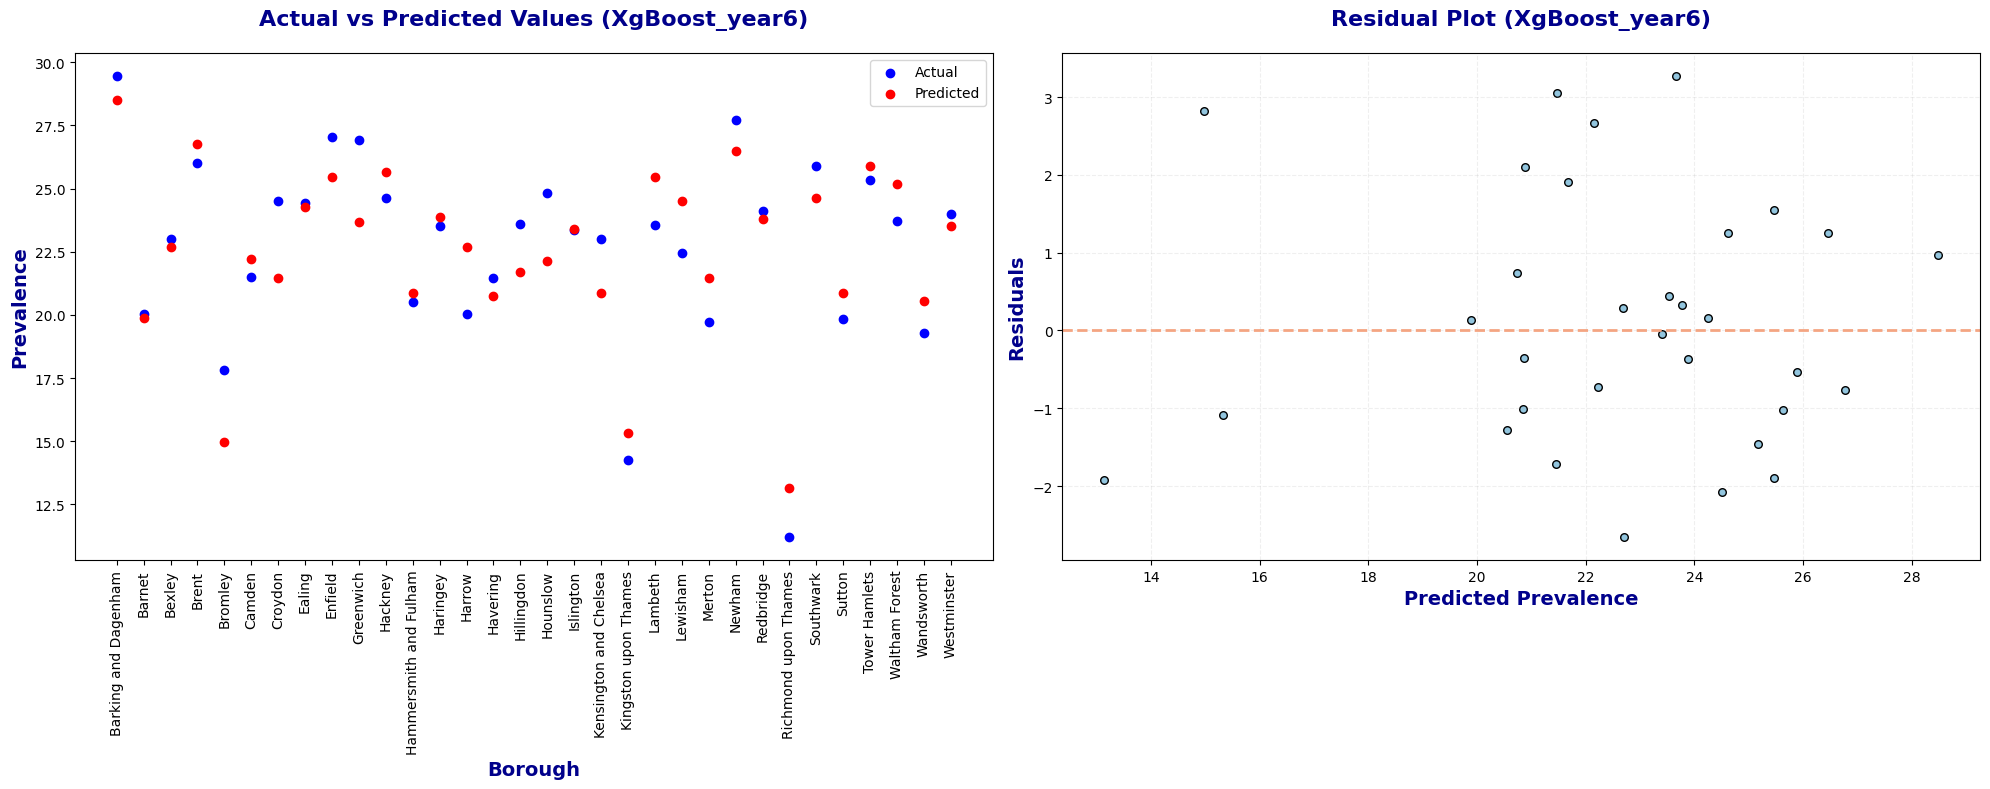

In [2769]:
plot_scatter_and_residual(y_test_xgb_year6, y_pred_xgb_year6, 'XgBoost_year6')

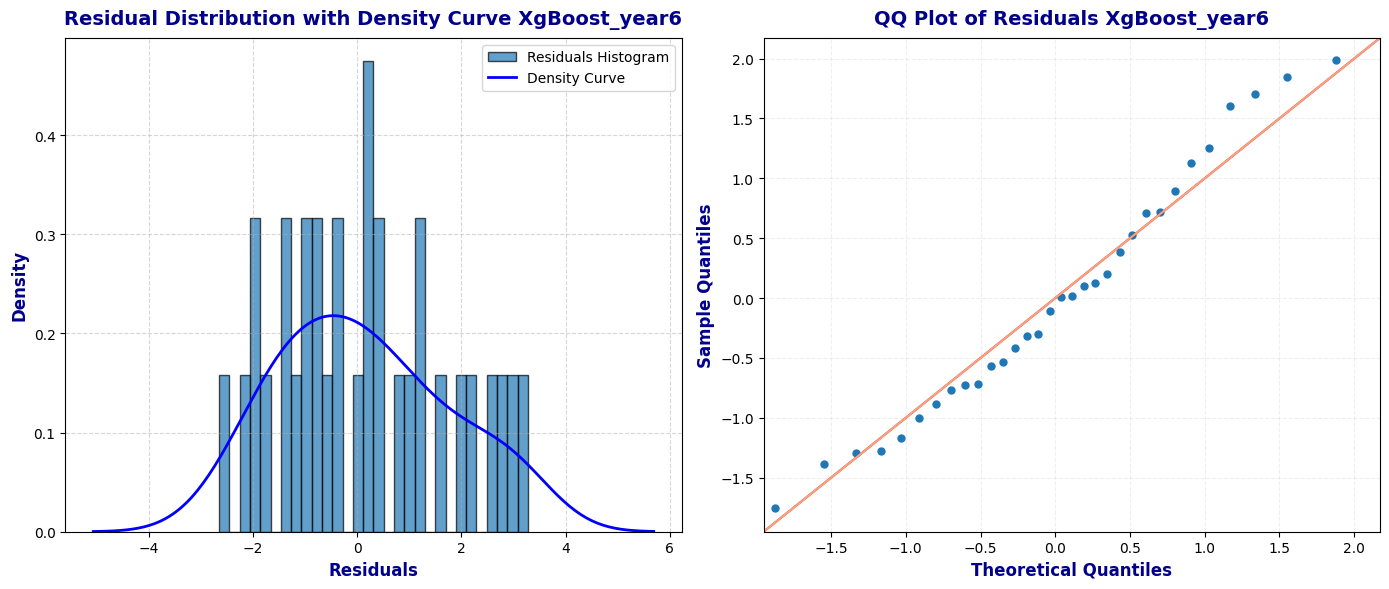

In [2772]:
plot_residual_distribution_and_QQplot(y_test_xgb_year6, y_pred_xgb_year6, 'XgBoost_year6')

The actual vs. predicted plot shows close alignment across boroughs.

The residuals are symmetrically distributed with minor skew, as confirmed by the QQ plot and density curve, indicating no major model bias.


#### XGBoost for reception group

In [ ]:
# Define the XgBoost model
model = XGBRegressor(random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],      
    'max_depth': [3, 5, 7],             
    'learning_rate': [0.01, 0.1, 0.2],        
}

# Use GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1)

# Train GridSearchCV on the training set
grid_search.fit(X_train_xgb_rep, y_train_xgb_rep)

# Display the best parameters
print("Best parameters: \n", grid_search.best_params_)

# Use teh best hyperparaameters to train teh model
best_model_xgb_rep = grid_search.best_estimator_
y_pred_xgb_rep = best_model_xgb_rep.predict(X_test_xgb_rep)

# Evaluate the model on the test set
mse = mean_squared_error(y_test_xgb_rep, y_pred_xgb_rep)
r2 = r2_score(y_test_xgb_rep, y_pred_xgb_rep)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best parameters: 
 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Mean Squared Error: 2.213954704438331
R-squared: 0.4393128590996581


The model for Reception children performs moderately well, explaining 43.9% of the variance with an MSE of 2.21. It requires a deeper tree (max depth = 5) and a faster learning rate (0.2), suggesting greater complexity and faster convergence.

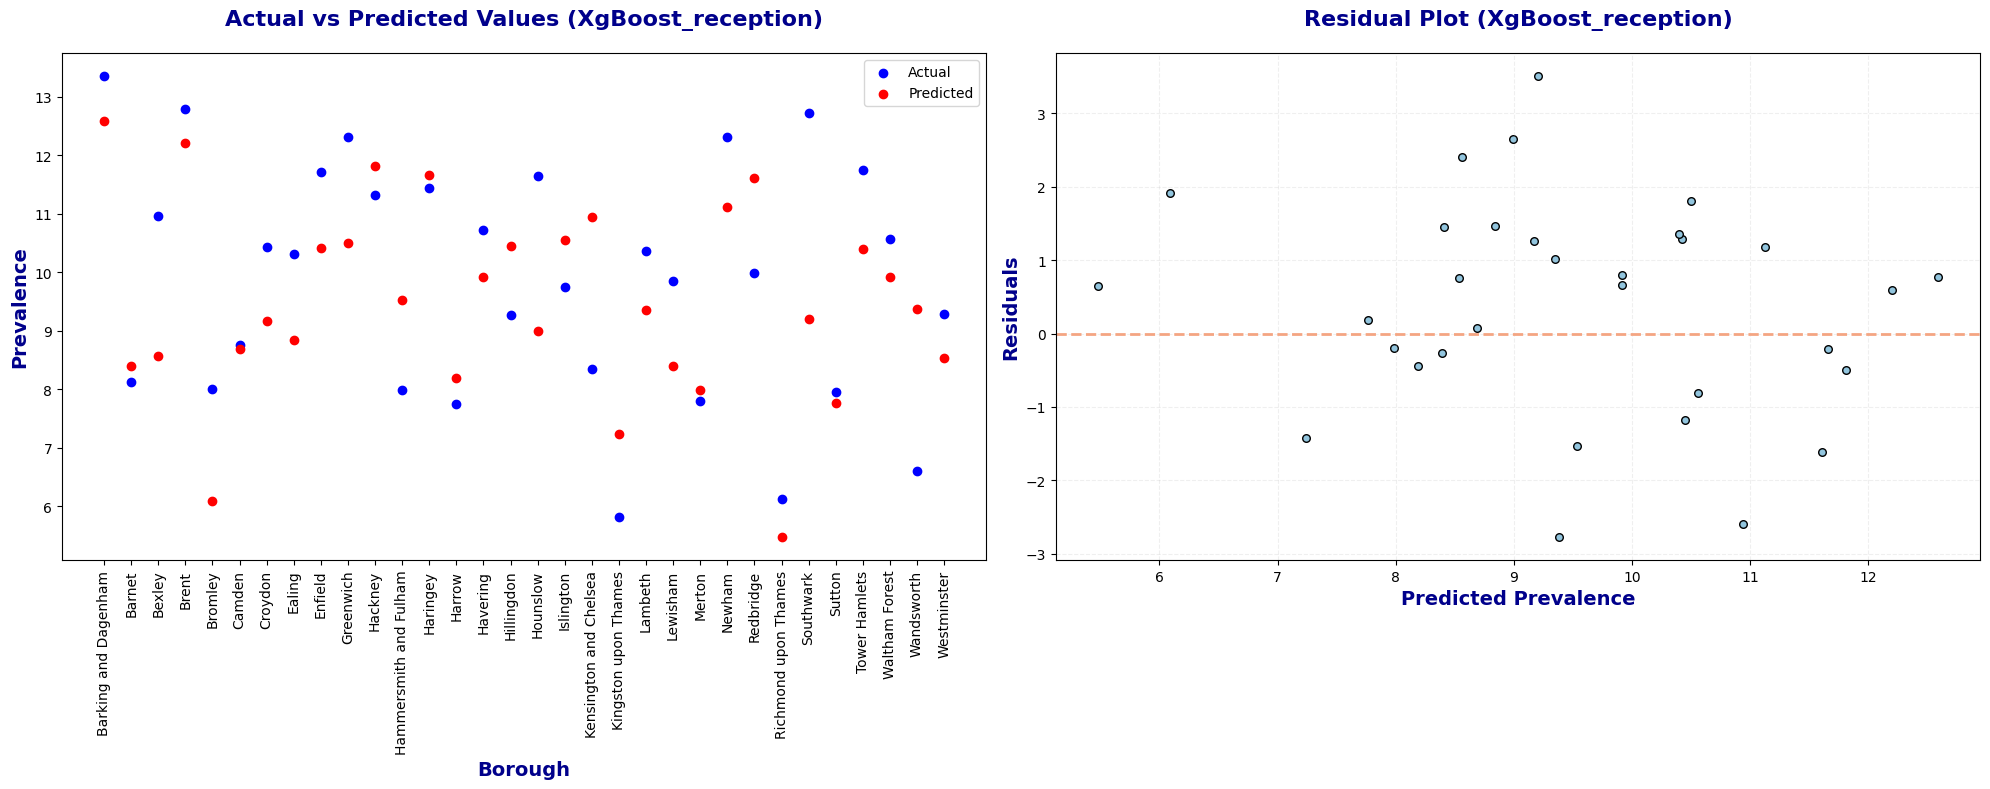

In [ ]:
plot_scatter_and_residual(y_test_xgb_rep, y_pred_xgb_rep, 'XgBoost_reception')

The actual vs. predicted values show wider scatter, and the residual plot indicates greater variability.

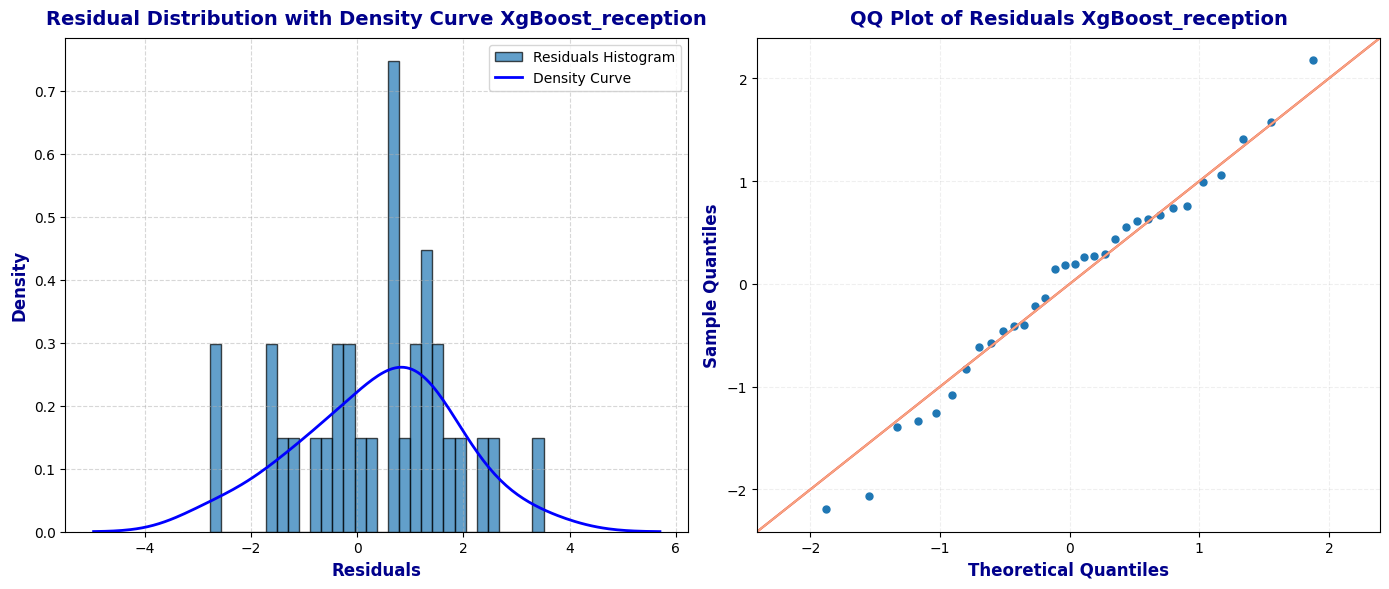

In [2773]:
plot_residual_distribution_and_QQplot(y_test_xgb_rep, y_pred_xgb_rep, 'XgBoost_reception')

The QQ plot shows slight deviations from normality, suggesting room for improvement in model calibration.

These patterns reflect greater noise or unobserved variation in this younger age group, potentially due to limited exposure to the external food environment

The XGBoost model predicts Year 6 obesity prevalence with high accuracy and well-behaved residuals, indicating strong signal capture. In contrast, the Reception model is less robust, highlighting the need for additional features or alternative modelling strategies in early childhood obesity prediction.

In [ ]:
# Since XGBoost’s prediction results for reception are insufficient, we focus on analyzing the model for year 6.

Feature Importance:
                                           Feature  Importance
2                          Population_per_hectare    0.390128
0                           Earnings per hour (£)    0.309796
3                               Ratio of children    0.163145
4  Rate per 100,000 population (fastfood outlets)    0.088291
1      Percentage (%) of people worked with NVQ4+    0.048639


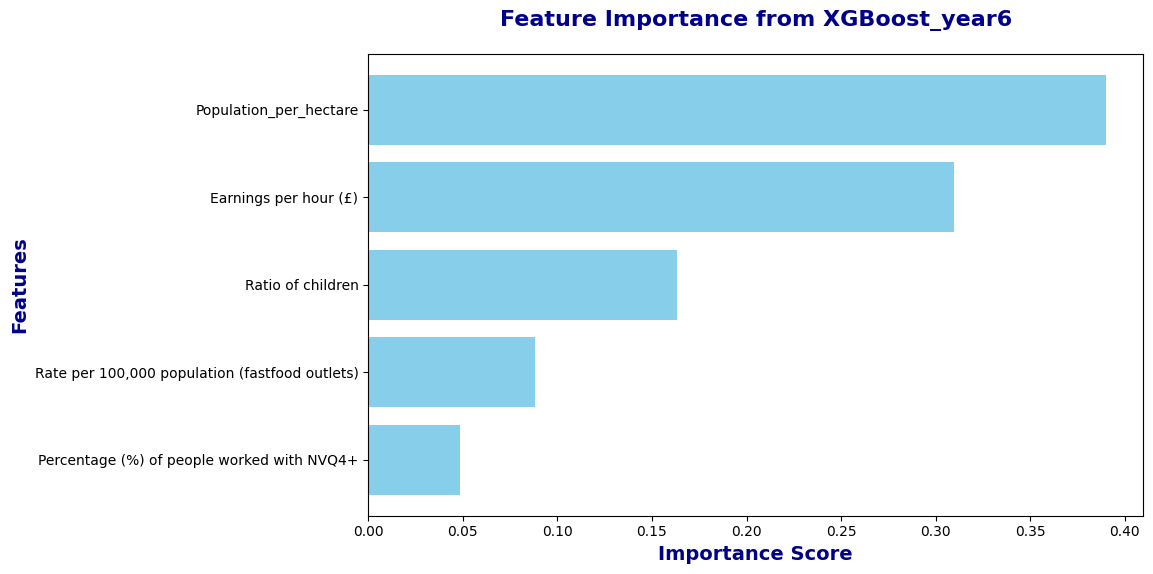

In [2774]:
# Get feature importance scores
importance = best_model_xgb_year6.feature_importances_
feature_names = X_train_xgb_year6.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:\n", importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.xlabel('Importance Score', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Features', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Feature Importance from XGBoost_year6', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.show()


The feature importance results from the XGBoost model for `Year 6` children highlight the dominant role of structural and socioeconomic factors in predicting obesity prevalence. `Population density` emerges as the most influential variable, underscoring the impact of urban living conditions—such as limited green space, increased exposure to unhealthy food outlets, and reduced physical activity opportunities—on children's health (Lopez and Hynes, 2006). `Hourly earnings` follow closely, reflecting the well-established link between lower income and limited access to healthy food options or health-promoting activities. The `ratio of children` also contributes meaningfully, potentially capturing family size or community-level youth concentration, which can influence dietary patterns and peer behaviour. While the `density of fast-food outlets` plays a smaller role, its inclusion confirms that the local food environment remains a relevant risk factor when contextualized within broader structural conditions. Lastly, `education levels (NVQ4+)`, though ranked lowest, may exert indirect influence through health literacy and parental decision-making, partly overlapping with income effects. Overall, the model suggests that effective obesity interventions for older children should move beyond environmental zoning to also address urban form, economic inequality, and educational disparities.

## 6. Conclusion

[[ go back to the top ]](#Table-of-contents)

After examining the relationship between the local food environment, socioeconomic factors, and childhood obesity in London, we could answer the RQs we posted before:  
  
`For RQ 1 (Yes)`, panel regression results showed a significant association between fast food outlet density and obesity among Year 6 children, suggesting that the food environment impacts older children with greater autonomy, while no such effect was found for Reception-aged children.   
`For RQ 2 (No)`, a difference-in-differences analysis evaluated the Takeaway Toolkit policy and found no significant short-term impact on obesity rates, indicating that stronger implementation or longer observation periods may be needed. Instead, income, education, and population density emerged as more consistent predictors across both age groups.  
`For RQ 3 (Partly)`, an XGBoost model demonstrated strong predictive power—particularly for Year 6—when combining fast food density with socioeconomic indicators. Feature importance analysis highlighted urban density, earnings, and education as key drivers. Overall, the findings underscore the importance of integrated strategies that address both environmental and structural determinants to effectively combat childhood obesity.

## 7. References

[[ go back to the top ]](#Table-of-contents)

Chen, T. and Guestrin, C. (2016). XGBoost: a Scalable Tree Boosting System. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining - KDD ’16, 1(1), pp.785–794. doi:https://doi.org/10.1145/2939672.2939785.  
Conley, T.G. and Taber, C.R. (2011). Inference with ‘Difference in Differences’ with a Small Number of Policy Changes. The Review of Economics and Statistics, [online] 93(1), pp.113–125. doi:https://doi.org/10.1162/REST_a_00049.  
Donald, S.G. and Lang, K. (2007). Inference with Difference-in-Differences and Other Panel Data. Review of Economics and Statistics, 89(2), pp.221–233. doi:https://doi.org/10.1162/rest.89.2.221.  
Dunton, G.F., Kaplan, J., Wolch, J., Jerrett, M. and Reynolds, K.D. (2009). Physical environmental correlates of childhood obesity: a systematic review. Obesity Reviews, 10(4), pp.393–402. doi:https://doi.org/10.1111/j.1467-789x.2009.00572.x.  
Jia, P., Luo, M., Li, Y., Zheng, J., Xiao, Q. and Luo, J. (2019). Fast‐food restaurant, unhealthy eating, and childhood obesity: A systematic review and meta‐analysis. Obesity Reviews, [online] 22(S1). doi:https://doi.org/10.1111/obr.12944.  
Lopez, R.P. and Hynes, H.P. (2006). Obesity, physical activity, and the urban environment: public health research needs. Environmental Health, 5(1). doi:https://doi.org/10.1186/1476-069x-5-25.  
Moon, H.R. and Weidner, M. (2015). DYNAMIC LINEAR PANEL REGRESSION MODELS WITH INTERACTIVE FIXED EFFECTS. Econometric Theory, 33(1), pp.158–195. doi:https://doi.org/10.1017/s0266466615000328.  
Patterson, R., Risby, A. and Chan, M.-Y. (2012). Consumption of takeaway and fast food in a deprived inner London Borough: are they associated with childhood obesity? BMJ Open, [online] 2(3), p.e000402. doi:https://doi.org/10.1136/bmjopen-2011-000402.  
Rogers, N.T., Amies-Cull, B., Adams, J., Chang, M., Cummins, S., Derbyshire, D., Hassan, S., Keeble, M., Liu, B., Medina-Lara, A., Savory, B., Rahilly, J., Smith, R., Thompson, C., White, M., Mytton, O. and Burgoine, T. (2024). Health impacts of takeaway management zones around schools in six different local authorities across England: a public health modelling study using PRIMEtime. BMC Medicine, 22(1). doi:https://doi.org/10.1186/s12916-024-03739-8.   
Schoeppe, S., Duncan, M.J., Badland, H., Oliver, M. and Curtis, C. (2013). Associations of children’s independent mobility and active travel with physical activity, sedentary behaviour and weight status: A systematic review. Journal of Science and Medicine in Sport, 16(4), pp.312–319. doi:https://doi.org/10.1016/j.jsams.2012.11.001.  
Wang, L., Zhao, C., Liu, X., Chen, X., Li, C., Wang, T., Wu, J. and Zhang, Y. (2021). Non-Linear Effects of the Built Environment and Social Environment on Bus Use among Older Adults in China: An Application of the XGBoost Model. International Journal of Environmental Research and Public Health, [online] 18(18), p.9592. doi:https://doi.org/10.3390/ijerph18189592.